In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [71]:
df = pd.read_csv('university_enrollment_2306.csv')
df_math = pd.read_csv('university_enrollment_2306.csv')

In [77]:
df_math[df_math['department'] == 'Math']

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
5,6,online,2014,246,50.1,76.0,Beginner,Math
12,13,online,2016,246,78.25,81.0,Beginner,Math
13,14,online,2016,257,53.78,76.0,None,Math
21,22,classroom,2014,180,91.4,76.0,None,Math
25,26,online,2020,256,21.05,74.0,None,Math
...,...,...,...,...,...,...,...,...
1835,1836,online,2022,245,75.93,76.0,Beginner,Math
1839,1840,online,2022,256,97.68,95.0,None,Math
1842,1843,online,2016,257,87.68,89.0,None,Math
1848,1849,online,2013,256,20.67,66.0,None,Math


In [4]:
df.head()

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,None,Science
2,3,online,2016,257,57.24,80.0,NaN,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science


In [5]:
df.describe()

,course_id,year,enrollment_count,post_score
count,1850.000000,1850.000000,1850.000000,1665.000000
mean,925.500000,2016.423784,231.565405,75.204805
std,534.193317,3.448278,36.987029,8.511981
min,1.000000,2011.000000,154.000000,51.000000
25%,463.250000,2013.000000,185.000000,69.000000
50%,925.500000,2016.000000,251.000000,75.000000
75%,1387.750000,2019.000000,261.000000,81.000000
max,1850.000000,2022.000000,267.000000,105.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_id         1850 non-null   int64  
 1   course_type       1850 non-null   object 
 2   year              1850 non-null   int64  
 3   enrollment_count  1850 non-null   int64  
 4   pre_score         1850 non-null   object 
 5   post_score        1665 non-null   float64
 6   pre_requirement   1761 non-null   object 
 7   department        1850 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 115.8+ KB


In [7]:
df_columns = df.columns
df_columns

Index(['course_id', 'course_type', 'year', 'enrollment_count', 'pre_score',
       'post_score', 'pre_requirement', 'department'],
      dtype='object')

In [8]:
for col in df_columns:
    print(df[col].unique(), '\n'*2)

[   1    2    3 ... 1848 1849 1850] 


['classroom' 'online'] 


[2018 2020 2016 2013 2019 2014 2021 2022 2011 2015 2012 2017] 


[165 175 257 251 246 241 261 180 170 256 231 181 236 185 247 155 160 161
 266 237 242 255 245 248 252 238 232 235 171 258 240 169 190 267 156 182
 176 179 154 250 249 159 166 164 262] 


['28.14' '79.68' '57.24' ... '76' '20.67' '17.57'] 


[ 73.  86.  80.  75.  76.  84.  88.  87.  79.  74.  85.  81.  70.  65.
  nan  72.  77.  83.  67.  96.  82.  94.  66.  91.  63.  61.  78.  62.
  90.  69.  60.  71.  95.  68.  54.  64. 105.  57.  98.  55.  56.  59.
  93.  51.  89.  92.  58.  97.  99. 100.  53. 102. 101. 103.] 


['Beginner' 'None' nan 'Intermediate'] 


['Science' 'Mathematics' 'Technology' 'Math' 'Engineering'] 




In [9]:
for col in df_columns:
    print(col,df[col].nunique(), '\n'*2)

course_id 1850 


course_type 2 


year 12 


enrollment_count 45 


pre_score 1594 


post_score 53 


pre_requirement 3 


department 5 




In [10]:
df['post_score'] = df['post_score'].fillna(0)

In [11]:
df['pre_requirement'] = df['pre_requirement'].fillna('None')

In [12]:
df['department'] = df['department'].replace({'Math':'Mathematics'})

In [13]:
df['pre_score'] = df['pre_score'].replace({'-':0})

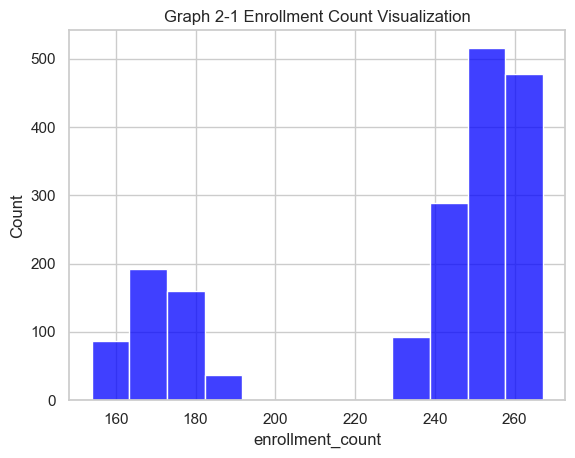

In [14]:
sns.set(style = 'whitegrid')
sns.histplot(df['enrollment_count'], color = 'blue')
plt.title('Graph 2-1 Enrollment Count Visualization')
plt.show()

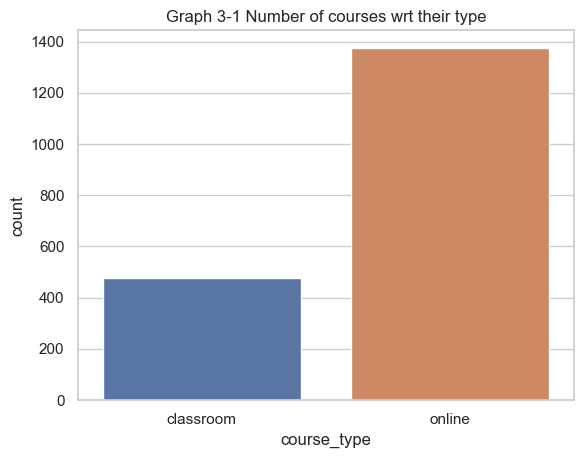

In [15]:
sns.set(style = 'whitegrid')
sns.countplot(data = df, x = 'course_type')
plt.title('Graph 3-1 Number of courses wrt their type')
plt.show()

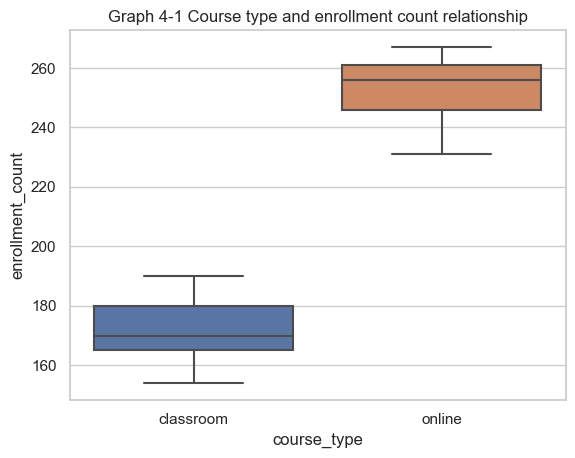

In [16]:
sns.set(style = 'whitegrid')
sns.boxplot(data = df, x = 'course_type', y = 'enrollment_count')
plt.title('Graph 4-1 Course type and enrollment count relationship')
plt.show()

In [17]:
df['pre_score'] = df['pre_score'].astype(float)
df['pre_score'].dtype == float

True

In [18]:
#Label encoding
df_v2 = df.copy()
df_v2.loc[df_v2["course_type"] == "classroom", "course_type"] = 1
df_v2.loc[df_v2["course_type"] == "online", "course_type"] = 0

df_v2.loc[df_v2["pre_requirement"] == "Intermediate", "pre_requirement"] = 1
df_v2.loc[df_v2["pre_requirement"] == "Beginner", "pre_requirement"] = 0.5
df_v2.loc[df_v2["pre_requirement"] == "None", "pre_requirement"] = 0

df_v2.loc[df_v2["department"] == "Engineering", "department"] = 1
df_v2.loc[df_v2["department"] == "Mathematics", "department"] = 0
df_v2.loc[df_v2["department"] == "Science", "department"] = 0
df_v2.loc[df_v2["department"] == "Technology", "department"] = 0

In [19]:
df_v2

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,1,2018,165,28.14,73.0,0.5,0
1,2,1,2020,175,79.68,86.0,0,0
2,3,0,2016,257,57.24,80.0,0,0
3,4,0,2013,251,97.67,75.0,0.5,0
4,5,1,2019,165,39.75,76.0,0.5,0
...,...,...,...,...,...,...,...,...
1845,1846,1,2018,155,60.01,81.0,1,0
1846,1847,0,2016,261,94.27,85.0,0,0
1847,1848,0,2011,257,76.00,81.0,0,0
1848,1849,0,2013,256,20.67,66.0,0,0


# Predicting on df_v2

In [20]:
df_v2_rel = df_v2.drop('course_id', axis =1)

In [25]:
X_1 = df_v2_rel.drop('enrollment_count', axis =1).values
y_1 = df_v2_rel['enrollment_count'].values

In [26]:
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1,y_1, test_size = 0.2, random_state = 23)

In [27]:
reg_1 = LinearRegression()

In [28]:
reg_1.fit(X_1_train,y_1_train)

LinearRegression()

In [29]:
y_1_pred = reg_1.predict(X_1_test)

In [33]:
reg_1_mse = MSE(y_1_test,y_1_pred)
reg_1_rmse = reg_1_mse ** (1/2)
reg_1_r2score_train = reg_1.score(X_1_train,y_1_train)
reg_1_r2score_test = reg_1.score(X_1_test,y_1_test)
print(f'reg_1_mse: {reg_1_mse} and reg_1_rmse: {reg_1_rmse} and r2score_train: {reg_1_r2score_train} and r2score_test: {reg_1_r2score_test}')

reg_1_mse: 15.014941051558393 and reg_1_rmse: 3.8749117475832136 and r2score_train: 0.9902036716165507 and r2score_test: 0.9891535372756832


# PREDICTING ON DF

In [35]:
df

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,None,Science
2,3,online,2016,257,57.24,80.0,None,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science
...,...,...,...,...,...,...,...,...
1845,1846,classroom,2018,155,60.01,81.0,Intermediate,Science
1846,1847,online,2016,261,94.27,85.0,None,Technology
1847,1848,online,2011,257,76.00,81.0,None,Mathematics
1848,1849,online,2013,256,20.67,66.0,None,Mathematics


In [36]:
df_rel = df.drop('course_id', axis = 1)
#for col in df_rel.columns:
    #print(col, df_rel[col].unique(), '\n'*2)

In [ ]:
#for x in range(0,1849):
    #print(x, df_rel['pre_score'][x], '\n'*2)

In [37]:
df_rel

,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,classroom,2018,165,28.14,73.0,Beginner,Science
1,classroom,2020,175,79.68,86.0,None,Science
2,online,2016,257,57.24,80.0,None,Mathematics
3,online,2013,251,97.67,75.0,Beginner,Technology
4,classroom,2019,165,39.75,76.0,Beginner,Science
...,...,...,...,...,...,...,...
1845,classroom,2018,155,60.01,81.0,Intermediate,Science
1846,online,2016,261,94.27,85.0,None,Technology
1847,online,2011,257,76.00,81.0,None,Mathematics
1848,online,2013,256,20.67,66.0,None,Mathematics


In [39]:
col_cat = ['course_type','pre_requirement', 'department']
df_encd = pd.get_dummies(df_rel, columns = col_cat)
df_encd

,year,enrollment_count,pre_score,post_score,course_type_classroom,course_type_online,pre_requirement_Beginner,pre_requirement_Intermediate,pre_requirement_None,department_Engineering,department_Mathematics,department_Science,department_Technology
0,2018,165,28.14,73.0,1,0,1,0,0,0,0,1,0
1,2020,175,79.68,86.0,1,0,0,0,1,0,0,1,0
2,2016,257,57.24,80.0,0,1,0,0,1,0,1,0,0
3,2013,251,97.67,75.0,0,1,1,0,0,0,0,0,1
4,2019,165,39.75,76.0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845,2018,155,60.01,81.0,1,0,0,1,0,0,0,1,0
1846,2016,261,94.27,85.0,0,1,0,0,1,0,0,0,1
1847,2011,257,76.00,81.0,0,1,0,0,1,0,1,0,0
1848,2013,256,20.67,66.0,0,1,0,0,1,0,1,0,0


In [41]:
X_2 = df_encd.drop('enrollment_count', axis =1).values
y_2 = df_encd['enrollment_count'].values

In [42]:
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2,y_2, test_size = 0.2, random_state = 23)

In [43]:
reg_2 = LinearRegression()

In [44]:
reg_2.fit(X_2_train,y_2_train)

LinearRegression()

In [45]:
y_2_pred = reg_2.predict(X_2_test)

In [46]:
reg_2_mse = MSE(y_2_test,y_2_pred)
reg_2_rmse = reg_2_mse ** (1/2)
reg_2_r2score_train = reg_2.score(X_2_train,y_2_train)
reg_2_r2score_test = reg_2.score(X_2_test,y_2_test)
print(f'reg_2_mse: {reg_2_mse} and reg_2_rmse: {reg_2_rmse} and r2score_train: {reg_2_r2score_train} and r2score_test: {reg_2_r2score_test}')

reg_2_mse: 0.11185241352584395 and reg_2_rmse: 0.3344434384553597 and r2score_train: 0.9999230460401614 and r2score_test: 0.9999192002799234


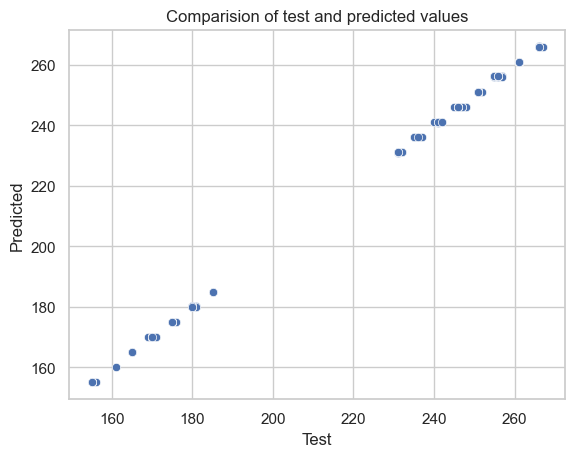

In [61]:
sns.scatterplot(x=y_2_test, y=y_2_pred)
plt.title('Comparision of test and predicted values')
plt.xlabel('Test')
plt.ylabel('Predicted')
plt.show()

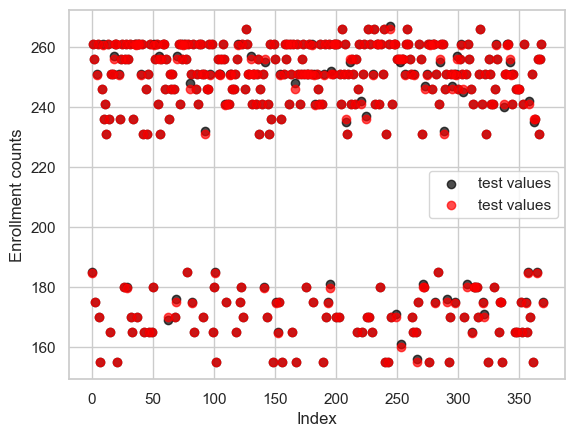

In [66]:
plt.scatter(np.arange(len(y_2_test)), y_2_test, color = 'black', label = 'test values', alpha = 0.7)
plt.scatter(np.arange(len(y_2_pred)), y_2_pred, color = 'red', label = 'test values', alpha = 0.7)
plt.legend()
plt.xlabel('Index')
plt.ylabel('Enrollment counts')
plt.show()

In [67]:
rf = RandomForestRegressor()

In [68]:
rf.fit(X_2_train,y_2_train)

RandomForestRegressor()

In [69]:
y_rf_pred = rf.predict(X_2_test)

In [70]:
rf_mse = MSE(y_2_test,y_rf_pred)
rf_rmse = rf_mse ** (1/2)
rf_r2score_train = rf.score(X_2_train,y_2_train)
rf_r2score_test = rf.score(X_2_test,y_2_test)
print(f'rf_mse: {rf_mse} and rf_rmse: {rf_rmse} and r2score_train: {rf_r2score_train} and r2score_test: {rf_r2score_test}')

rf_mse: 0.153946554054054 and rf_rmse: 0.39236023505708884 and r2score_train: 0.9999855225731776 and r2score_test: 0.9998887923998935


# Using OneHotEncoder

In [40]:
encod = OneHotEncoder()
encod_fit = encod.fit_transform(df_rel[col_cat])
encod_arr = encod_fit.toarray()
encod_df = pd.DataFrame(encod_arr, columns = encod.get_feature_names_out(input_features=col_cat))
encod_df


,course_type_classroom,course_type_online,pre_requirement_Beginner,pre_requirement_Intermediate,pre_requirement_None,department_Engineering,department_Mathematics,department_Science,department_Technology
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
1845,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1846,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1847,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1848,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [51]:
encod_df_mix = df_rel.join(encod_df, how = 'inner')
encod_df_mix

,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department,course_type_classroom,course_type_online,pre_requirement_Beginner,pre_requirement_Intermediate,pre_requirement_None,department_Engineering,department_Mathematics,department_Science,department_Technology
0,classroom,2018,165,28.14,73.0,Beginner,Science,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,classroom,2020,175,79.68,86.0,None,Science,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,online,2016,257,57.24,80.0,None,Mathematics,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,online,2013,251,97.67,75.0,Beginner,Technology,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,classroom,2019,165,39.75,76.0,Beginner,Science,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845,classroom,2018,155,60.01,81.0,Intermediate,Science,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1846,online,2016,261,94.27,85.0,None,Technology,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1847,online,2011,257,76.00,81.0,None,Mathematics,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1848,online,2013,256,20.67,66.0,None,Mathematics,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [52]:
df_encod_for_reg = encod_df_mix.drop(col_cat, axis =1)
df_encod_for_reg

,year,enrollment_count,pre_score,post_score,course_type_classroom,course_type_online,pre_requirement_Beginner,pre_requirement_Intermediate,pre_requirement_None,department_Engineering,department_Mathematics,department_Science,department_Technology
0,2018,165,28.14,73.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2020,175,79.68,86.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,2016,257,57.24,80.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,2013,251,97.67,75.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2019,165,39.75,76.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845,2018,155,60.01,81.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1846,2016,261,94.27,85.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1847,2011,257,76.00,81.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1848,2013,256,20.67,66.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [53]:
X_3 = df_encod_for_reg.drop('enrollment_count', axis = 1).values
y_3 = df_encod_for_reg['enrollment_count'].values


In [50]:
#df_encd_for_X = df_encd.drop('enrollment_count', axis = 1)
#df_encd_for_X_col = df_encd_for_X.columns


In [54]:
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3,y_3, test_size = 0.2, random_state = 23)

In [57]:
reg_3 = LinearRegression()
reg_3.fit(X_3_train,y_3_train)

LinearRegression()

In [58]:
y_3_pred = reg_3.predict(X_3_test)

In [59]:
reg_3_mse = MSE(y_3_test,y_3_pred)
reg_3_rmse = reg_3_mse ** (1/2)
reg_3_r2score_train = reg_3.score(X_3_train,y_3_train)
reg_3_r2score_test = reg_3.score(X_3_test,y_3_test)
print(f'reg_3_mse: {reg_3_mse} and reg_3_rmse: {reg_3_rmse} and r2score_train: {reg_3_r2score_train} and r2score_test: {reg_3_r2score_test}')

reg_3_mse: 0.11185241352584395 and reg_3_rmse: 0.3344434384553597 and r2score_train: 0.9999230460401614 and r2score_test: 0.9999192002799234
